####DATASET LINK:  https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset?utm_source=chatgpt.com&select=bank.csv

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px

df = pd.read_csv("bank.csv")

In [ ]:
df = df.dropna(subset=['age', 'job', 'marital', 'deposit'])


In [ ]:
df.shape

(11162, 17)

In [ ]:
# Count totals of 'deposit' column
deposit_totals = df['deposit'].value_counts()

print("Deposit column totals:")
print(deposit_totals)

Deposit column totals:
deposit
no     5873
yes    5289
Name: count, dtype: int64


In [ ]:
# Load the original dataframe to ensure 'deposit' column is available
df = pd.read_csv("bank.csv")

# Count proportions of 'yes' and 'no' in 'deposit'
deposit_counts = df['deposit'].value_counts().reset_index()
deposit_counts.columns = ['deposit', 'count']

# Create pie chart
fig = px.pie(
    deposit_counts,
    names='deposit',
    values='count',
    title="Proportion of 'deposit' Feature (Yes vs No)",
    color='deposit',
    color_discrete_map={'yes': 'blue', 'no': 'orange'}
)

# Show chart
fig.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
394,26,blue-collar,single,secondary,yes,81,no,yes,cellular,8,jul,803,2,-1,0,unknown,yes
9846,32,blue-collar,single,secondary,no,232,no,no,unknown,13,dec,232,1,-1,0,unknown,no
2535,25,management,single,tertiary,no,528,no,no,cellular,14,aug,201,1,-1,0,unknown,yes
1443,35,admin.,married,secondary,no,898,yes,no,cellular,9,apr,214,1,-1,0,unknown,yes
3950,33,unemployed,single,secondary,no,2066,no,yes,cellular,9,sep,305,1,749,2,failure,yes
8628,56,management,married,tertiary,no,3120,yes,no,cellular,7,aug,666,2,-1,0,unknown,no
7869,43,technician,single,secondary,no,34,no,no,telephone,30,jul,29,1,-1,0,unknown,no
10596,42,blue-collar,married,primary,no,0,yes,yes,cellular,7,may,209,2,-1,0,unknown,no
10621,25,blue-collar,single,primary,no,17,yes,no,unknown,13,may,97,2,-1,0,unknown,no
6926,20,student,single,secondary,no,130,no,no,telephone,4,may,75,3,-1,0,unknown,no


Accuracy: 0.5858465213496566

Confusion Matrix:
 [[1545  217]
 [1170  417]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.88      0.69      1762
           1       0.66      0.26      0.38      1587

    accuracy                           0.59      3349
   macro avg       0.61      0.57      0.53      3349
weighted avg       0.61      0.59      0.54      3349



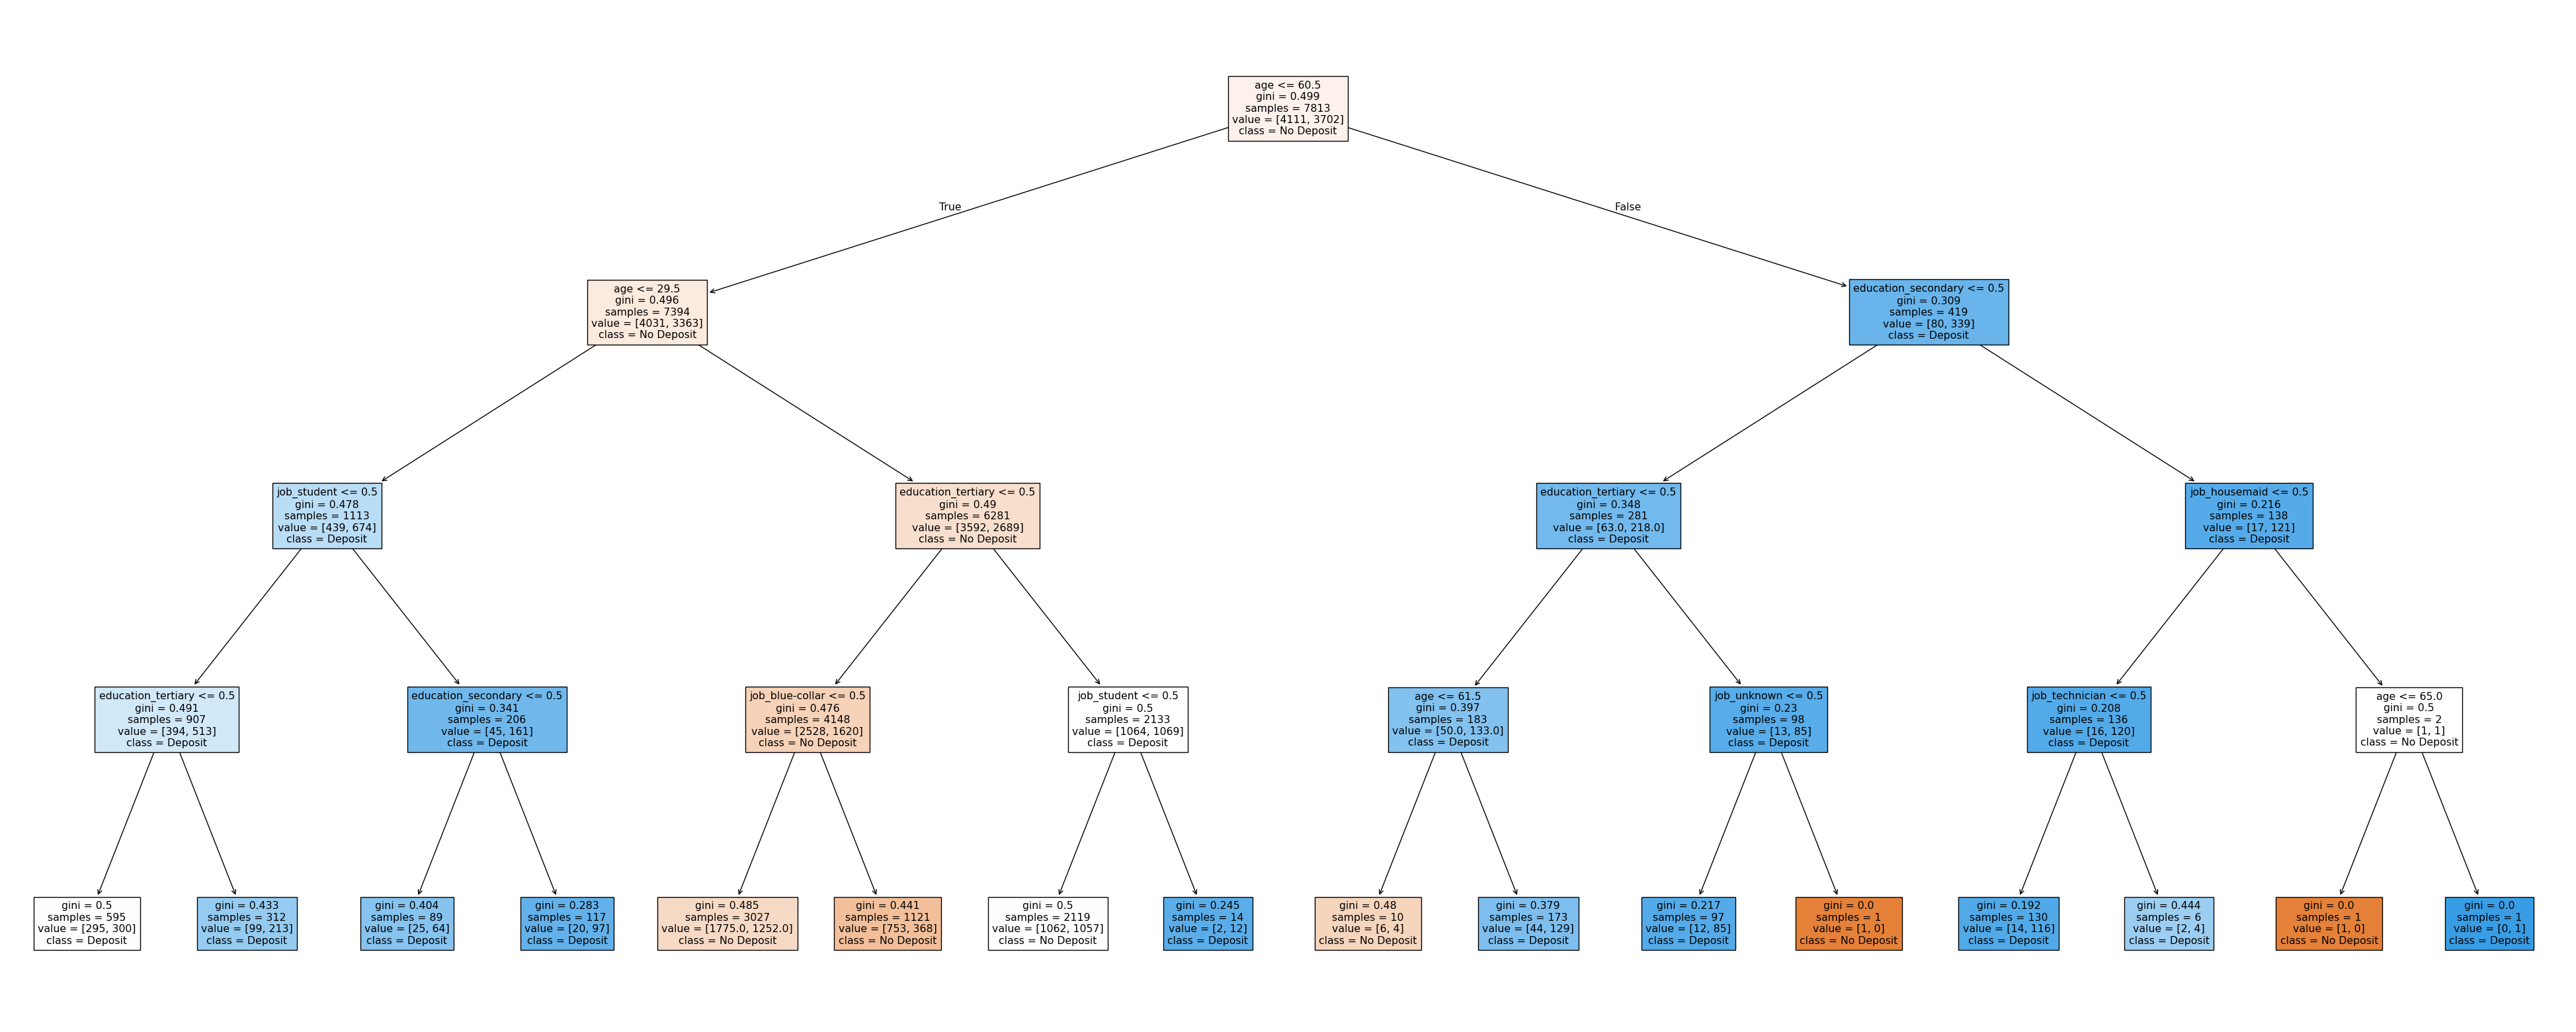

In [ ]:
# Load dataset
df = pd.read_csv("bank.csv")

# Define variables
X = df[['age', 'job', 'education', ]]
y = df['deposit']   # target

# Encode categorical variables (job, education, deposit)
X = pd.get_dummies(X, drop_first=True)
y = y.map({'no':0, 'yes':1})   # Convert to binary 0/1

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Build decision tree model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create Visualization for Decision Tree
plt.figure(figsize=(50,20))
fontsize = 30
plot_tree(dt, feature_names=X.columns, class_names=['No Deposit', 'Deposit'], filled=True)
plt.show()


In [ ]:

######### MORE SIMPLIFIED RANDOM FOREST CLASSIFIER CELL

# Using existing X and y
rf = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=6,        # limit depth for interpretability
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6004777545535981

Confusion Matrix:
 [[1397  365]
 [ 973  614]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.79      0.68      1762
           1       0.63      0.39      0.48      1587

    accuracy                           0.60      3349
   macro avg       0.61      0.59      0.58      3349
weighted avg       0.61      0.60      0.58      3349



Accuracy: 0.603

Confusion Matrix:
 [[1395  367]
 [ 964  623]]

Classification Report:
               precision    recall  f1-score   support

           0      0.591     0.792     0.677      1762
           1      0.629     0.393     0.484      1587

    accuracy                          0.603      3349
   macro avg      0.610     0.592     0.580      3349
weighted avg      0.609     0.603     0.585      3349



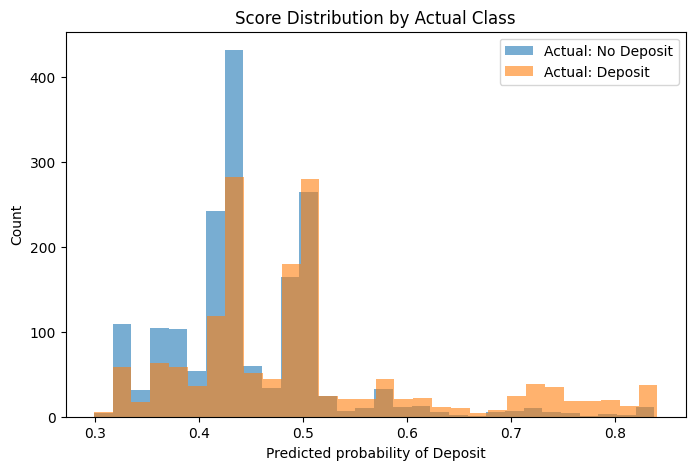


=== Decile Lift Table (higher deciles = higher propensity) ===


/tmp/ipython-input-1837635746.py:57: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,n,responders,avg_score,response_rate,cum_n,cum_responders,lift
decile,,,,,,,
D1,335,123,0.340738,0.367164,335,123,0.774816
D2,335,122,0.385221,0.364179,670,245,0.768517
D3,335,112,0.414456,0.334328,1005,357,0.705523
D4,335,131,0.427768,0.391045,1340,488,0.825210
D5,334,133,0.432443,0.398204,1674,621,0.840317
D6,335,161,0.464402,0.480597,2009,782,1.014190
D7,335,177,0.494577,0.528358,2344,959,1.114979
D8,335,173,0.503777,0.516418,2679,1132,1.089782
D9,335,192,0.543283,0.573134,3014,1324,1.209469


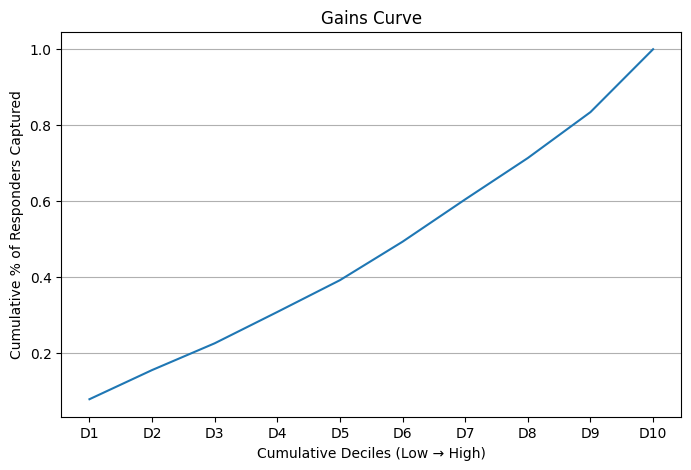


=== Top Feature Importances ===


,0
age,0.551289
job_student,0.118344
education_tertiary,0.089937
job_blue-collar,0.083663
job_retired,0.057757
education_secondary,0.032257
education_unknown,0.012061
job_entrepreneur,0.010807
job_management,0.009835
job_unemployed,0.009085


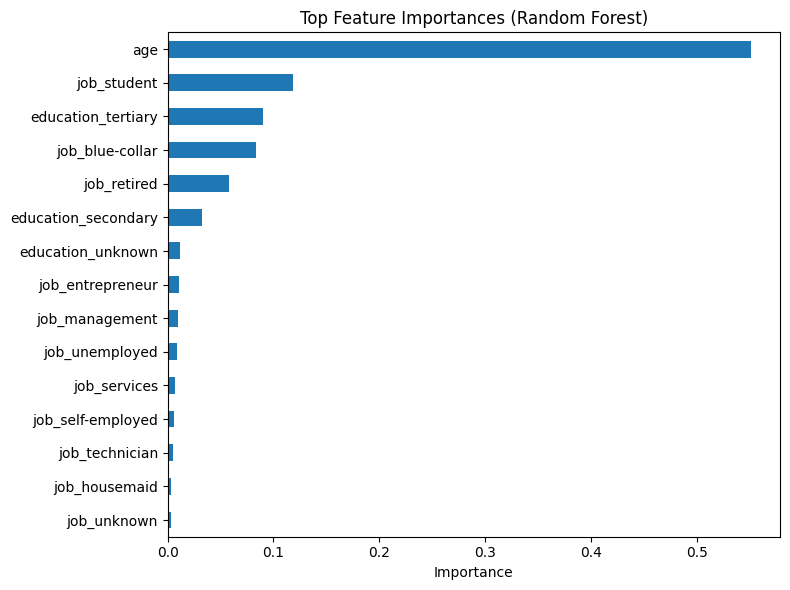


=== Segment Prioritization (job × education) ===


/tmp/ipython-input-1837635746.py:123: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,job,education,n,resp_rate_all,n_in_top30,resp_rate_top30,lift_top30_vs_group
12,housemaid,primary,38.0,0.184211,4.0,0.750000,4.071429
47,unknown,unknown,12.0,0.333333,2.0,1.000000,3.000000
25,self-employed,secondary,50.0,0.340000,1.0,1.000000,2.941176
4,blue-collar,primary,214.0,0.345794,1.0,1.000000,2.891892
3,admin.,unknown,14.0,0.428571,2.0,1.000000,2.333333
29,services,secondary,223.0,0.385650,7.0,0.857143,2.222591
37,technician,secondary,346.0,0.384393,17.0,0.705882,1.836356
14,housemaid,tertiary,13.0,0.384615,6.0,0.666667,1.733333
5,blue-collar,secondary,328.0,0.387195,16.0,0.625000,1.614173
40,unemployed,primary,12.0,0.750000,3.0,1.000000,1.333333



If you target the top 9% (threshold ≥ 0.605):
  Audience size: 336
  Observed response rate: 0.783 (overall=0.474)
  Lift: 1.65x

If you target the top 19% (threshold ≥ 0.509):
  Audience size: 672
  Observed response rate: 0.677 (overall=0.474)
  Lift: 1.43x

If you target the top 30% (threshold ≥ 0.499):
  Audience size: 1035
  Observed response rate: 0.624 (overall=0.474)
  Lift: 1.32x

If you target the top 40% (threshold ≥ 0.488):
  Audience size: 1344
  Observed response rate: 0.601 (overall=0.474)
  Lift: 1.27x

If you target the top 50% (threshold ≥ 0.441):
  Audience size: 1675
  Observed response rate: 0.577 (overall=0.474)
  Lift: 1.22x


In [ ]:
########## CODE GENERATED TO OBTAIN A MORE IN-DEPTH LOOK AT WHAT FEATURES SPECIFICALLY COULD IMPACT SUCCESS OF 'deposit' TARGET VARIABLE

# Load & minimal prep (use chosen Xs- can add more predictors)
df = pd.read_csv("bank.csv")

# Target: deposit ('yes'/'no')
df['deposit_bin'] = df['deposit'].map({'no':0, 'yes':1}).astype(int)

# Predictors (starting simple; can expand this list)
predictors = ['age', 'job', 'education']  # add: 'balance','housing','loan','contact','duration', etc.

X = pd.get_dummies(df[predictors], drop_first=True)
y = df['deposit_bin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Train a Random Forest (good balance of performance & stability)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate quickly
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probability of "deposit = yes"

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# Probability distribution by actual class (helps pick a marketing threshold)
plt.figure(figsize=(8,5))
plt.hist(y_proba[y_test==0], bins=30, alpha=0.6, label="Actual: No Deposit")
plt.hist(y_proba[y_test==1], bins=30, alpha=0.6, label="Actual: Deposit")
plt.xlabel("Predicted probability of Deposit")
plt.ylabel("Count")
plt.title("Score Distribution by Actual Class")
plt.legend()
plt.show()

# Decile lift table (who to target first)
test_df = X_test.copy()
test_df['y_true'] = y_test.values
test_df['score']  = y_proba

# Rank by score, highest to lowest, then bucket into deciles
test_df = test_df.sort_values('score', ascending=False)
test_df['decile'] = pd.qcut(test_df['score'].rank(method='first', ascending=False),
                            q=10, labels=[f'D{d}' for d in range(10,0,-1)])

decile_table = (
    test_df.groupby('decile')
           .agg(
               n=('y_true','size'),
               responders=('y_true','sum'),
               avg_score=('score','mean')
           )
           .sort_index(ascending=False)
)
decile_table['response_rate'] = decile_table['responders'] / decile_table['n']
decile_table['cum_n'] = decile_table['n'].cumsum()
decile_table['cum_responders'] = decile_table['responders'].cumsum()
overall_rate = test_df['y_true'].mean()
decile_table['lift'] = decile_table['response_rate'] / overall_rate

print("\n=== Decile Lift Table (higher deciles = higher propensity) ===")
display(decile_table)

# Optional: simple gains chart
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,11), decile_table['cum_responders']/decile_table['responders'].sum())
plt.xticks(np.arange(1,11), [f'D{i}' for i in range(1,11)])
plt.xlabel("Cumulative Deciles (Low → High)")
plt.ylabel("Cumulative % of Responders Captured")
plt.title("Gains Curve")
plt.grid(True, axis='y')
plt.show()

# Feature importance (what drives the score)
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Top Feature Importances ===")
display(imp.head(15))

plt.figure(figsize=(8,6))
imp.head(15).iloc[::-1].plot(kind='barh')
plt.xlabel("Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# High-leverage segment finder
# Define "top prospects" as top 30% by score (tune to your budget)
cut = test_df['score'].quantile(0.70)
test_df['top30_flag'] = (test_df['score'] >= cut).astype(int)

# Bring back raw categorical columns for readable segments
cat_cols = ['job','education']  # add others if you used them
raw_test = df.loc[X_test.index, cat_cols + ['deposit_bin']].copy()
seg = pd.concat([test_df[['top30_flag','score']], raw_test], axis=1)

# Segment performance: how concentrated are responders in our top 30% within each group?
def seg_metrics(g):
    n = len(g)
    rate_all = g['deposit_bin'].mean()
    n_top = g['top30_flag'].sum()
    rate_top = g.loc[g['top30_flag']==1, 'deposit_bin'].mean() if n_top>0 else np.nan
    lift_top = (rate_top / rate_all) if (rate_all>0 and pd.notnull(rate_top)) else np.nan
    return pd.Series({
        'n': n,
        'resp_rate_all': rate_all,
        'n_in_top30': n_top,
        'resp_rate_top30': rate_top,
        'lift_top30_vs_group': lift_top
    })

seg_table = (
    seg.groupby(cat_cols)
       .apply(seg_metrics)
       .reset_index()
       .sort_values(['lift_top30_vs_group','resp_rate_top30'], ascending=[False, False])
)

print("\n=== Segment Prioritization (job × education) ===")
display(seg_table.head(15))

# Actionable thresholds (quick helper)
for p in [0.90, 0.80, 0.70, 0.60, 0.50]:
    thr = test_df['score'].quantile(p)
    subset = test_df[test_df['score'] >= thr]
    if len(subset)>0:
        print(f"\nIf you target the top {int((1-p)*100)}% (threshold ≥ {thr:.3f}):")
        print(f"  Audience size: {len(subset)}")
        print(f"  Observed response rate: {subset['y_true'].mean():.3f} (overall={overall_rate:.3f})")
        print(f"  Lift: {(subset['y_true'].mean()/overall_rate):.2f}x")


Accuracy: 0.603

Confusion Matrix:
 [[1395  367]
 [ 964  623]]

Classification Report:
               precision    recall  f1-score   support

           0      0.591     0.792     0.677      1762
           1      0.629     0.393     0.484      1587

    accuracy                          0.603      3349
   macro avg      0.610     0.592     0.580      3349
weighted avg      0.609     0.603     0.585      3349



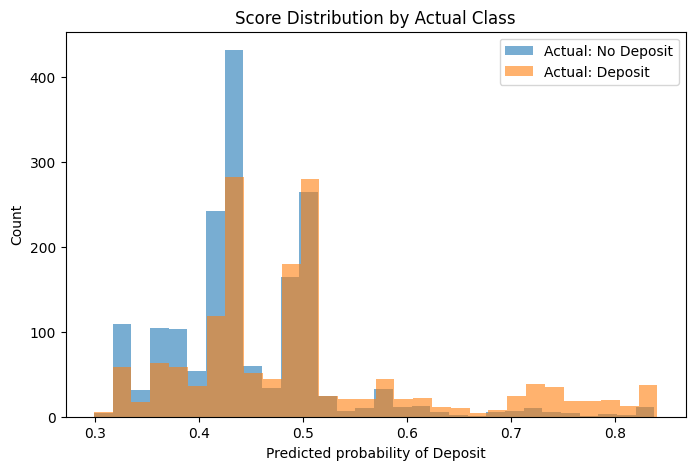


=== Decile Lift Table (higher deciles = higher propensity) ===


/tmp/ipython-input-610580497.py:52: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,n,responders,avg_score,response_rate,cum_n,cum_responders,lift
decile,,,,,,,
D1,335,123,0.340738,0.367164,335,123,0.774816
D2,335,122,0.385221,0.364179,670,245,0.768517
D3,335,112,0.414456,0.334328,1005,357,0.705523
D4,335,131,0.427768,0.391045,1340,488,0.825210
D5,334,133,0.432443,0.398204,1674,621,0.840317
D6,335,161,0.464402,0.480597,2009,782,1.014190
D7,335,177,0.494577,0.528358,2344,959,1.114979
D8,335,173,0.503777,0.516418,2679,1132,1.089782
D9,335,192,0.543283,0.573134,3014,1324,1.209469


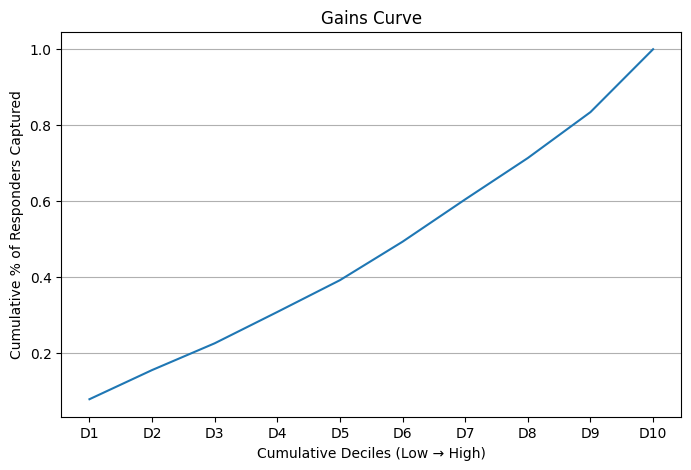


=== Top Feature Importances ===


,0
age,0.551289
job_student,0.118344
education_tertiary,0.089937
job_blue-collar,0.083663
job_retired,0.057757
education_secondary,0.032257
education_unknown,0.012061
job_entrepreneur,0.010807
job_management,0.009835
job_unemployed,0.009085


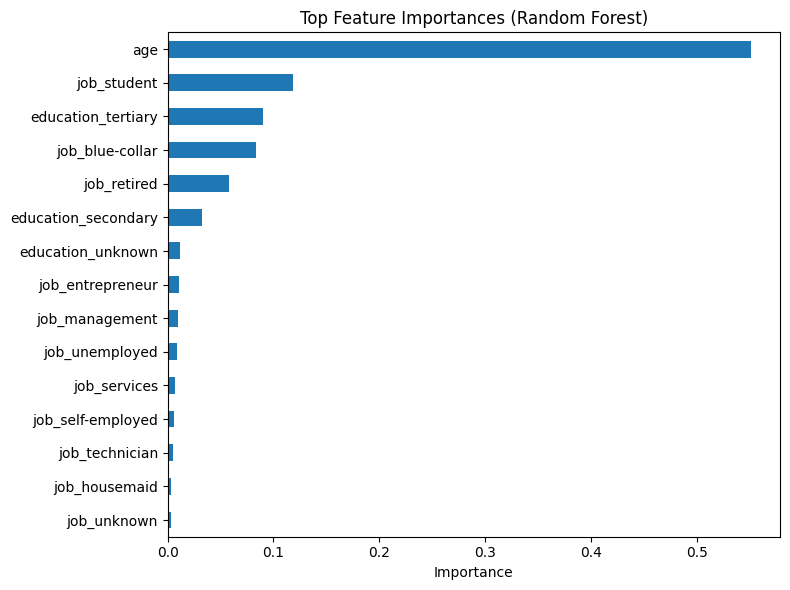


=== Segment Prioritization (job × education) ===


/tmp/ipython-input-610580497.py:118: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,job,education,n,resp_rate_all,n_in_top30,resp_rate_top30,lift_top30_vs_group
12,housemaid,primary,38.0,0.184211,4.0,0.750000,4.071429
47,unknown,unknown,12.0,0.333333,2.0,1.000000,3.000000
25,self-employed,secondary,50.0,0.340000,1.0,1.000000,2.941176
4,blue-collar,primary,214.0,0.345794,1.0,1.000000,2.891892
3,admin.,unknown,14.0,0.428571,2.0,1.000000,2.333333
29,services,secondary,223.0,0.385650,7.0,0.857143,2.222591
37,technician,secondary,346.0,0.384393,17.0,0.705882,1.836356
14,housemaid,tertiary,13.0,0.384615,6.0,0.666667,1.733333
5,blue-collar,secondary,328.0,0.387195,16.0,0.625000,1.614173
40,unemployed,primary,12.0,0.750000,3.0,1.000000,1.333333



If you target the top 9% (threshold ≥ 0.605):
  Audience size: 336
  Observed response rate: 0.783 (overall=0.474)
  Lift: 1.65x

If you target the top 19% (threshold ≥ 0.509):
  Audience size: 672
  Observed response rate: 0.677 (overall=0.474)
  Lift: 1.43x

If you target the top 30% (threshold ≥ 0.499):
  Audience size: 1035
  Observed response rate: 0.624 (overall=0.474)
  Lift: 1.32x

If you target the top 40% (threshold ≥ 0.488):
  Audience size: 1344
  Observed response rate: 0.601 (overall=0.474)
  Lift: 1.27x

If you target the top 50% (threshold ≥ 0.441):
  Audience size: 1675
  Observed response rate: 0.577 (overall=0.474)
  Lift: 1.22x


In [ ]:

# Target: deposit (yes/no)
df['deposit_bin'] = df['deposit'].map({'no':0, 'yes':1}).astype(int)

# Predictors (start simple; you can expand this list)
predictors = ['age', 'job', 'education']  # add: 'balance','housing','loan','contact','duration', etc.

X = pd.get_dummies(df[predictors], drop_first=True)
y = df['deposit_bin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Train a Random Forest (good balance of performance & stability)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# Evaluate quickly
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probability of "deposit = yes"

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# Probability distribution by actual class (helps pick a marketing threshold)
plt.figure(figsize=(8,5))
plt.hist(y_proba[y_test==0], bins=30, alpha=0.6, label="Actual: No Deposit")
plt.hist(y_proba[y_test==1], bins=30, alpha=0.6, label="Actual: Deposit")
plt.xlabel("Predicted probability of Deposit")
plt.ylabel("Count")
plt.title("Score Distribution by Actual Class")
plt.legend()
plt.show()

# Decile lift table (who to target first)
test_df = X_test.copy()
test_df['y_true'] = y_test.values
test_df['score']  = y_proba

# Rank by score, highest to lowest, then bucket into deciles
test_df = test_df.sort_values('score', ascending=False)
test_df['decile'] = pd.qcut(test_df['score'].rank(method='first', ascending=False),
                            q=10, labels=[f'D{d}' for d in range(10,0,-1)])

decile_table = (
    test_df.groupby('decile')
           .agg(
               n=('y_true','size'),
               responders=('y_true','sum'),
               avg_score=('score','mean')
           )
           .sort_index(ascending=False)
)
decile_table['response_rate'] = decile_table['responders'] / decile_table['n']
decile_table['cum_n'] = decile_table['n'].cumsum()
decile_table['cum_responders'] = decile_table['responders'].cumsum()
overall_rate = test_df['y_true'].mean()
decile_table['lift'] = decile_table['response_rate'] / overall_rate

print("\n=== Decile Lift Table (higher deciles = higher propensity) ===")
display(decile_table)

# Optional: simple gains chart
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,11), decile_table['cum_responders']/decile_table['responders'].sum())
plt.xticks(np.arange(1,11), [f'D{i}' for i in range(1,11)])
plt.xlabel("Cumulative Deciles (Low → High)")
plt.ylabel("Cumulative % of Responders Captured")
plt.title("Gains Curve")
plt.grid(True, axis='y')
plt.show()

# Feature importance (what drives the score)
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Top Feature Importances ===")
display(imp.head(15))

plt.figure(figsize=(8,6))
imp.head(15).iloc[::-1].plot(kind='barh')
plt.xlabel("Importance")
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# High-leverage segment finder
# Define "top prospects" as top 30% by score (tune to your budget)
cut = test_df['score'].quantile(0.70)
test_df['top30_flag'] = (test_df['score'] >= cut).astype(int)

# Bring back raw categorical columns for readable segments
cat_cols = ['job','education']  # add others if you used them
raw_test = df.loc[X_test.index, cat_cols + ['deposit_bin']].copy()
seg = pd.concat([test_df[['top30_flag','score']], raw_test], axis=1)

# Segment performance: how concentrated are responders in our top 30% within each group?
def seg_metrics(g):
    n = len(g)
    rate_all = g['deposit_bin'].mean()
    n_top = g['top30_flag'].sum()
    rate_top = g.loc[g['top30_flag']==1, 'deposit_bin'].mean() if n_top>0 else np.nan
    lift_top = (rate_top / rate_all) if (rate_all>0 and pd.notnull(rate_top)) else np.nan
    return pd.Series({
        'n': n,
        'resp_rate_all': rate_all,
        'n_in_top30': n_top,
        'resp_rate_top30': rate_top,
        'lift_top30_vs_group': lift_top
    })

seg_table = (
    seg.groupby(cat_cols)
       .apply(seg_metrics)
       .reset_index()
       .sort_values(['lift_top30_vs_group','resp_rate_top30'], ascending=[False, False])
)

print("\n=== Segment Prioritization (job × education) ===")
display(seg_table.head(15))

# Actionable thresholds (quick helper)
for p in [0.90, 0.80, 0.70, 0.60, 0.50]:
    thr = test_df['score'].quantile(p)
    subset = test_df[test_df['score'] >= thr]
    if len(subset)>0:
        print(f"\nIf you target the top {int((1-p)*100)}% (threshold ≥ {thr:.3f}):")
        print(f"  Audience size: {len(subset)}")
        print(f"  Observed response rate: {subset['y_true'].mean():.3f} (overall={overall_rate:.3f})")
        print(f"  Lift: {(subset['y_true'].mean()/overall_rate):.2f}x")
